# Investigation of Protest Patterns in Asia

In [99]:
# Imports for EDA

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# read dataset
df = pd.read_csv('../data/mmALL_073119_csv.csv')

In [101]:
df.shape

(16363, 31)

In [102]:
pd.set_option('display.max_columns',None)

In [103]:
df.head()

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,national,NaN,1000s,unspecified,"political behavior, process",labor wage dispute,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Great Canadian train journeys into history;...,Canada s railway passenger system was finally...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,"Montreal, Quebec",NaN,1000,unspecified,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Autonomy s Cry Revived in Quebec The New Yo...,protestors were only identified as young peop...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,"Montreal, Quebec",NaN,500,separatist Parti Quebecois,"political behavior, process",NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. Quebec protest after Queen calls for unity ...,"THE Queen, after calling on Canadians to rema..."
3,201990004,Canada,20,1990,North America,1,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,"Montreal, Quebec",NaN,100s,Mohawk Indians,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,1. Indians Gather as Siege Intensifies; Armed ...,Canada s federal government has agreed to acq...
4,201990005,Canada,20,1990,North America,1,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,"Montreal, Quebec",NaN,950,local residents,"political behavior, process",NaN,NaN,NaN,crowd dispersal,arrests,accomodation,NaN,NaN,NaN,NaN,1. Dozens hurt in Mohawk blockade protest The ...,Protests were directed against the state due t...


In [104]:
# some engineering for protest length by total days
# CAVEAT: the 'days' column may be imprecise when start and endmonths are not equal
# This feature must be understood as an approximate duration of individual days

df['years'] = df['endyear'] - df['startyear']
df['months'] = df['endmonth'] - df['startmonth']
df['days'] = df['endday'] - df['startday']

df['total_days'] = df['days'] + (df['months']*30.5) + (df['years']*365)

In [105]:
df['protesterdemand1'].value_counts().head(15)

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [106]:
df.groupby(['protesterdemand1','stateresponse1','protest']).count().head(25)

id  country  ccode  \
protesterdemand1            stateresponse1  protest                         
labor wage dispute          accomodation    1         205      205    205   
                            arrests         1          70       70     70   
                            beatings        1          23       23     23   
                            crowd dispersal 1         326      326    326   
                            ignore          1        1006     1006   1006   
                            killings        1           8        8      8   
                            shootings       1          23       23     23   
land farm issue             accomodation    1          49       49     49   
                            arrests         1          28       28     28   
                            beatings        1           6        6      6   
                            crowd dispersal 1         111      111    111   
                            ignore          1         234      234    234   
                            killings        1           7        7      7   
                            shootings       1          12       12     12   
police brutality            accomodation    1          51       51     51   
                            arrests         1          63       63     63   
                            beatings        1          35       35     35   
                            crowd dispersal 1         270      270    270   
                            ignore          1         296      296    296   
                            killings        1          20       20     20   
                            shootings       1          47       47     47   
political behavior, process accomodation    1         432      432    432   
                            arrests         1         704      704    704   
                            beatings        1         198      198    198   
                            crowd dispersal 1        2334     2334   2334   

                                                     year  region  \
protesterdemand1            stateresponse1  protest                 
labor wage dispute          accomodation    1         205     205   
                            arrests         1          70      70   
                            beatings        1          23      23   
                            crowd dispersal 1         326     326   
                            ignore          1        1006    1006   
                            killings        1           8       8   
                            shootings       1          23      23   
land farm issue             accomodation    1          49      49   
                            arrests         1          28      28   
                            beatings        1           6       6   
                            crowd dispersal 1         111     111   
                            ignore          1         234     234   
                            killings        1           7       7   
                            shootings       1          12      12   
police brutality            accomodation    1          51      51   
                            arrests         1          63      63   
                            beatings        1          35      35   
                            crowd dispersal 1         270     270   
                            ignore          1         296     296   
                            killings        1          20      20   
                            shootings       1          47      47   
political behavior, process accomodation    1         432     432   
                            arrests         1         704     704   
                            beatings        1         198     198   
                            crowd dispersal 1        2334    2334   

                                                     protestnumber  startday  \
protesterdemand1            sta

In [107]:
# Value Count feature investigations

df['stateresponse2'].value_counts()

arrests            692
crowd dispersal    568
accomodation       382
beatings           370
shootings          360
killings           311
ignore              33
Name: stateresponse2, dtype: int64

In [108]:
df['stateresponse3'].value_counts()

arrests            214
crowd dispersal    207
killings           175
accomodation        92
beatings            80
shootings           72
ignore              10
Name: stateresponse3, dtype: int64

In [109]:
df['stateresponse4'].value_counts()

accomodation       64
arrests            50
crowd dispersal    40
killings           38
shootings          19
beatings           19
Name: stateresponse4, dtype: int64

In [110]:
df['protesterdemand1'].value_counts()

political behavior, process    9181
labor wage dispute             1667
price increases, tax policy    1059
removal of politician           950
police brutality                785
land farm issue                 448
social restrictions             413
Name: protesterdemand1, dtype: int64

In [111]:
df['protesterdemand2'].value_counts()

political behavior, process    973
removal of politician          603
labor wage dispute             417
price increases, tax policy    201
social restrictions            201
police brutality               181
land farm issue                100
Name: protesterdemand2, dtype: int64

In [112]:
df['protesterdemand3'].value_counts()

price increases, tax policy    111
labor wage dispute              60
removal of politician           56
political behavior, process     35
police brutality                28
social restrictions             14
land farm issue                 12
Name: protesterdemand3, dtype: int64

In [113]:
df['protesteridentity'].value_counts()

protesters                                                                          1300
students                                                                             490
unspecified                                                                          224
workers                                                                              223
farmers                                                                              187
                                                                                    ... 
Irish Nurses and Midwives Organization  INMO  and SIPTU                                1
consumer interest, civil activist groups                                               1
Assembly of Small scale Farmers                                                        1
Two lobby groups, the Save Democracy Women  SDW  and Impact Future Nigeria  IFN        1
supporters of the United National Independence Party  UNIP                             1
Name: protesteridenti

In [114]:
df['protesterviolence'].value_counts()

0.0    11217
1.0     3816
Name: protesterviolence, dtype: int64

In [115]:
df['stateresponse7'].value_counts()

.               913
accomodation      3
arrests           2
killings          1
beatings          1
Name: stateresponse7, dtype: int64

In [116]:
df.groupby(['stateresponse1','protesterdemand1'])['country'].count()

stateresponse1   protesterdemand1           
accomodation     labor wage dispute              205
                 land farm issue                  49
                 police brutality                 51
                 political behavior, process     432
                 price increases, tax policy      82
                 removal of politician            90
                 social restrictions              28
arrests          labor wage dispute               70
                 land farm issue                  28
                 police brutality                 63
                 political behavior, process     704
                 price increases, tax policy      98
                 removal of politician            57
                 social restrictions              27
beatings         labor wage dispute               23
                 land farm issue                   6
                 police brutality                 35
                 political behavior, process     198
 

In [117]:
# Investigate Nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     16363 non-null  int64  
 1   country                16363 non-null  object 
 2   ccode                  16363 non-null  int64  
 3   year                   16363 non-null  int64  
 4   region                 16363 non-null  object 
 5   protest                16363 non-null  int64  
 6   protestnumber          16363 non-null  int64  
 7   startday               14514 non-null  float64
 8   startmonth             14514 non-null  float64
 9   startyear              14514 non-null  float64
 10  endday                 14514 non-null  float64
 11  endmonth               14514 non-null  float64
 12  endyear                14514 non-null  float64
 13  protesterviolence      15033 non-null  float64
 14  location               14493 non-null  object 
 15  pa

In [118]:
df[df['country'] == 'Cuba'].shape

(120, 35)

In [119]:
df.sort_values(by='protestnumber',ascending=False).groupby('country').count()

,id,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes,years,months,days,total_days
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,55,55,55,55,55,55,38,38,38,38,38,38,54,38,26,54,31,38,7,0,7,38,5,0,0,7,0,5,38,38,38,38,38,38
Albania,82,82,82,82,82,82,67,67,67,67,67,67,67,67,67,67,67,67,12,0,18,67,26,2,0,18,0,1,67,67,67,67,67,67
Algeria,74,74,74,74,74,74,58,58,58,58,58,58,71,58,35,71,58,58,27,0,20,58,5,0,0,20,0,3,58,58,58,58,58,58
Angola,37,37,37,37,37,37,23,23,23,23,23,23,23,23,23,23,23,23,1,0,2,23,8,1,0,2,0,3,23,23,23,23,23,23
Argentina,116,116,116,116,116,116,112,112,112,112,112,112,113,112,19,113,84,112,6,0,7,111,24,5,0,7,0,5,112,112,112,112,112,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,35,35,35,35,35,35,19,19,19,19,19,19,31,19,4,31,19,19,6,2,2,19,9,1,0,2,0,1,19,18,19,19,19,19
Yemen,165,165,165,165,165,165,157,157,157,157,157,157,162,157,45,162,92,157,71,4,2,157,46,17,5,3,1,11,157,157,157,157,157,157
Yugoslavia,138,138,138,138,138,138,137,137,137,137,137,137,137,137,136,137,137,137,50,8,3,137,33,13,5,0,0,0,137,137,137,137,137,137


In [120]:
df.groupby(['country','protest'])['protestnumber'].sum()

country      protest
Afghanistan  0             0
             1           107
Albania      0             0
             1           265
Algeria      0             0
                        ... 
Yugoslavia   1          1328
Zambia       0             0
             1           309
Zimbabwe     0             0
             1           420
Name: protestnumber, Length: 321, dtype: int64

In [121]:
pd.DataFrame(df.groupby(['country','protest']).sum().sort_values(by='protestnumber',ascending=False)['protestnumber']).head(25).T

country,Kenya,Ireland,France,United Kingdom,Germany,Bangladesh,Ukraine,Greece,Romania,South Korea,Nigeria,Yemen,Venezuela,China,Cuba,Kyrgyzstan,Thailand,Namibia,Madagascar,Brazil,Nepal,Yugoslavia,Bulgaria,USSR,South Africa
protest,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
protestnumber,12662,7188,6984,6004,5421,4966,4330,3322,3295,3188,2578,2534,2314,2245,2143,2006,1783,1684,1439,1426,1353,1328,1263,1155,1066


In [122]:
# Early removal of features identified as not being relevant.

df.drop(columns=['id','sources','notes'],inplace=True)

In [123]:
# including start day for protest duration
df['total_days'] = df['total_days'] + 1

In [124]:
# create dummy columns with recognizable column names
# Exclusive credit to Jenn for this terrific solution.

protest_demands = ['protesterdemand1','protesterdemand2', 'protesterdemand3', 'protesterdemand4']
state_responses = ['stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
                   'stateresponse5', 'stateresponse6', 'stateresponse7']

def get_dum_cols(df, list_of_columns):
    list_of_dfs = []
    
    for col in list_of_columns:
        col_df = pd.get_dummies(df[col])
        list_of_dfs.append(col_df)
        
    #combine all df's vertically, so only areas with null values are where a potential column was empty    
    dfs_concat = pd.concat(list_of_dfs, axis = 0).fillna(0)
    
    #convert the concatenated df with all values now filled in into a list of separate dfs - each with all columns
    num_dfs = len(list_of_columns)
    num_rows = len(df)
    list_of_final_dfs = []
    
    for i in range(num_dfs):
        new_df = dfs_concat[num_rows*i : num_rows*(i+1)]
        list_of_final_dfs.append(new_df)
        
    # create combined final df
    final_df = list_of_final_dfs[0]
    
    for j in range(1, len(list_of_final_dfs)):
        final_df += list_of_final_dfs[j]
        
    return final_df

In [125]:
# Utilize encoding function
response_cats = get_dum_cols(df,state_responses)
demand_cats = get_dum_cols(df,protest_demands)

# combine newwly encoded features
df = pd.concat([df,demand_cats,response_cats],axis=1)

# Remove rows that did not have any protest observations
df = df[df['protest'] == 1].copy()

In [126]:
# Early creation of MENA region specific DataFrame for EDA

asia_df = df[df['region'] == 'Asia'].copy()

In [127]:
# Checking for extremes
asia_df[df['years'] > 1]

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,.
14531,India,750,2014,Asia,1,11,3.0,6.0,2014.0,3.0,6.0,2016.0,1.0,"Jawahar Bagh, a public garden in the city of M...",2000-4999,"About 2,000 people",A group that was calling for higher gasoline s...,"political behavior, process","price increases, tax policy",NaN,NaN,crowd dispersal,killings,shootings,NaN,NaN,NaN,NaN,2.0,0.0,0.0,731.0,0,0,0,1,1,0,0.0,0.0,0,0,0,1.0,0.0,1,1.0,0.0


In [128]:
asia_df[df['months'] > 1].sort_values(by='months',ascending=False).head(25)

/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,location,participants_category,participants,protesteridentity,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,years,months,days,total_days,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,.,accomodation,arrests,beatings,crowd dispersal,ignore,killings,shootings,.
13444,Kazakhstan,705,2011,Asia,1,1,26.0,5.0,2011.0,19.0,12.0,2011.0,1.0,western Kazakhstan; Zhanaozen and Aktau,NaN,15000,oil and gas workers,labor wage dispute,"political behavior, process",NaN,NaN,arrests,beatings,ignore,shootings,arrests,killings,accomodation,0.0,7.0,-7.0,207.5,1,0,0,1,0,0,0.0,0.0,1,2,1,0.0,1.0,1,1.0,0.0
15544,Thailand,800,2001,Asia,1,6,16.0,5.0,2001.0,16.0,12.0,2001.0,0.0,Bangkok,NaN,130,villagers,land farm issue,NaN,NaN,NaN,accomodation,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0.0,214.5,0,1,0,0,0,0,0.0,0.0,1,0,0,0.0,0.0,0,0.0,0.0
15883,Vietnam,816,2016,Asia,1,1,15.0,4.0,2016.0,2.0,10.0,2016.0,1.0,National Hanoi; Ho Chi Minh City; Ha Tinh pr...,2000-4999,"More than 4,000 people","Affected fishermen, Vietnamese protesters","political behavior, process",NaN,NaN,NaN,arrests,crowd dispersal,beatings,NaN,NaN,NaN,NaN,0.0,6.0,-13.0,171.0,0,0,0,1,0,0,0.0,0.0,0,1,1,1.0,0.0,0,0.0,0.0
15865,Vietnam,816,2000,Asia,1,1,3.0,7.0,2000.0,15.0,11.0,2000.0,0.0,Ho Chi Minh City,NaN,75,peasants,"political behavior, process",removal of politician,land farm issue,NaN,accomodation,crowd dispersal,NaN,NaN,NaN,NaN,NaN,0.0,4.0,12.0,135.0,0,1,0,1,0,1,0.0,0.0,1,0,0,1.0,0.0,0,0.0,0.0
14760,Pakistan,770,2014,Asia,1,5,14.0,8.0,2014.0,16.0,12.0,2014.0,1.0,Lahore to Islamabad,>10000,10000s,Imran Khan,removal of politician,NaN,NaN,NaN,crowd dispersal,accomodation,shootings,killings,NaN,NaN,NaN,0.0,4.0,2.0,125.0,0,0,0,0,0,1,0.0,0.0,1,0,0,1.0,0.0,1,1.0,0.0
13552,China,710,2007,Asia,1,5,1.0,7.0,2007.0,18.0,10.0,2007.0,0.0,Xiantang,NaN,200,locals,land farm issue,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,17.0,109.5,0,1,0,0,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0
15866,Vietnam,816,2001,Asia,1,1,2.0,2.0,2001.0,2.0,5.0,2001.0,1.0,"started in Pleiku, spread to many districts, v...",NaN,1000,"ethnic minorities, Protestants",social restrictions,land farm issue,NaN,NaN,arrests,crowd dispersal,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0,92.5,0,1,0,0,0,0,1.0,0.0,0,1,0,1.0,0.0,0,0.0,0.0
15583,Thailand,800,2005,Asia,1,5,11.0,8.0,2005.0,11.0,11.0,2005.0,0.0,"Maha Sarakham, Bangkok, Phitsanulok, Muang",NaN,20000,Network of Teaching Professions,labor wage dispute,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,0.0,92.5,1,0,0,0,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0
15568,Thailand,800,2004,Asia,1,3,23.0,2.0,2004.0,11.0,5.0,2004.0,0.0,"Nonthaburi , Songkhla, Khon Kaen, Chiang Mai, ...",NaN,30000,Electricity Generating Authority of Thailand ...,labor wage dispute,NaN,NaN,NaN,ignore,accomodation,NaN,NaN,NaN,NaN,NaN,0.0,3.0,-12.0,80.5,1,0,0,0,0,0,0.0,0.0,1,0,0,0.0,1.0,0,0.0,0.0
15519,Thailand,800,1997,Asia,1,1,27.0,1.0,1997.0,20.0,4.0,1997.0,0.0,Bangkok,NaN,10000,"palm oil farmers, Assembly of the Poor",land farm issue,NaN,NaN,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,-7.0,85.5,0,1,0,0,0,0,0.0,0.0,0,0,0,0.0,1.0,0,0.0,0.0


## Chart Options for Slides & Analysis

Text(0.5, 1.0, 'MENA Totals of All Response Types - Asia')

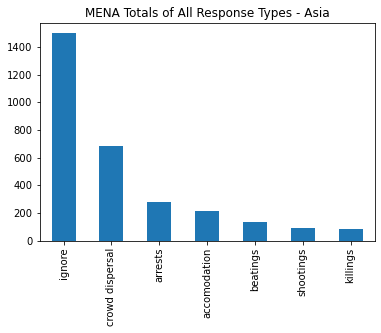

In [129]:
# Bar charts were particularly useful for ascending values grouped by different categories

asia_df['stateresponse1'].value_counts().plot.bar();
plt.title('MENA Totals of All Response Types - Asia')

Text(0.5, 1.0, 'Average Protest Duration by Country - Asia')

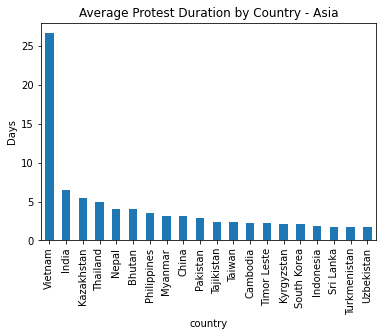

In [130]:
asia_df.groupby('country')['total_days'].mean().sort_values(ascending=False).head(20).plot.bar();
plt.ylabel('Days')
plt.title('Average Protest Duration by Country - Asia')

Text(0.5, 1.0, 'Average Protest Amount by Country - Asia')

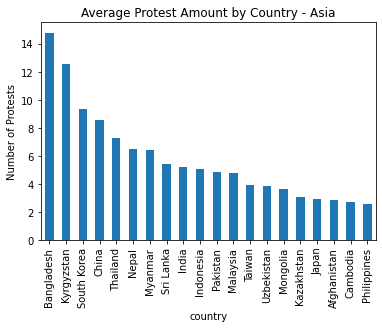

In [131]:
asia_df.groupby('country')['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar();
plt.ylabel('Number of Protests')
plt.title('Average Protest Amount by Country - Asia')

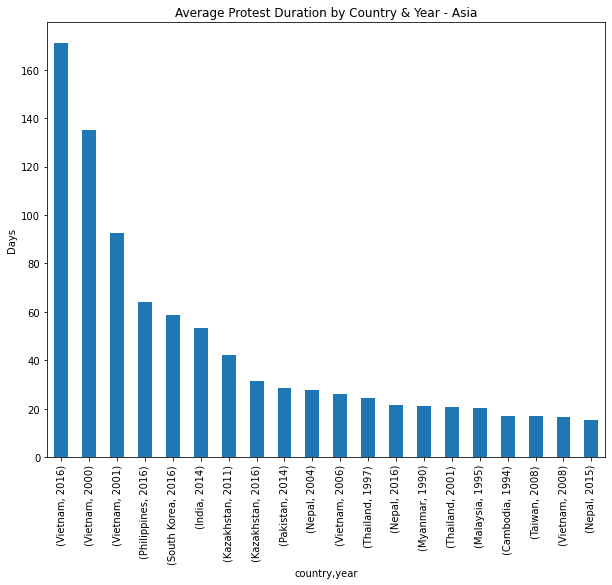

In [132]:
plt.figure(figsize=(10,8))
asia_df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.ylabel('Days')
plt.title('Average Protest Duration by Country & Year - Asia');

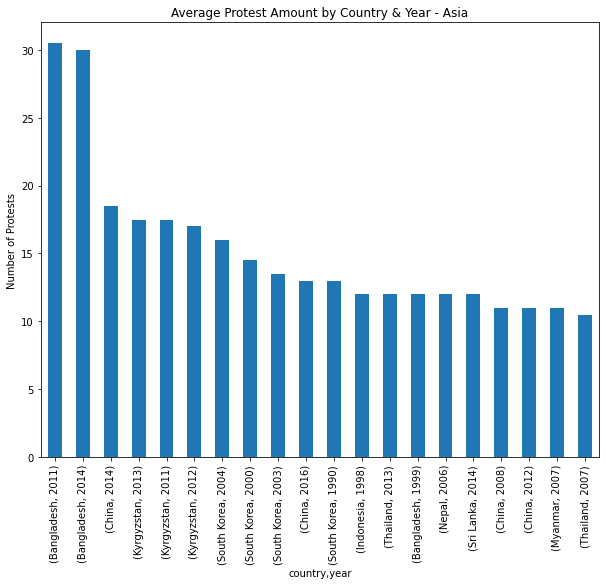

In [133]:
plt.figure(figsize=(10,8))
asia_df.groupby(['country','year'])['protestnumber'].mean().sort_values(ascending=False).head(20).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Amount by Country & Year - Asia');

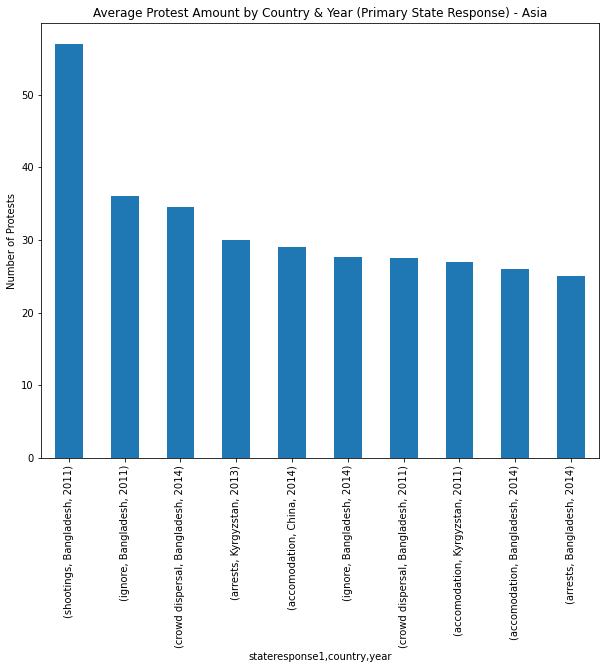

In [134]:
plt.figure(figsize=(10,8))
asia_df.groupby(['stateresponse1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Amount by Country & Year (Primary State Response) - Asia');

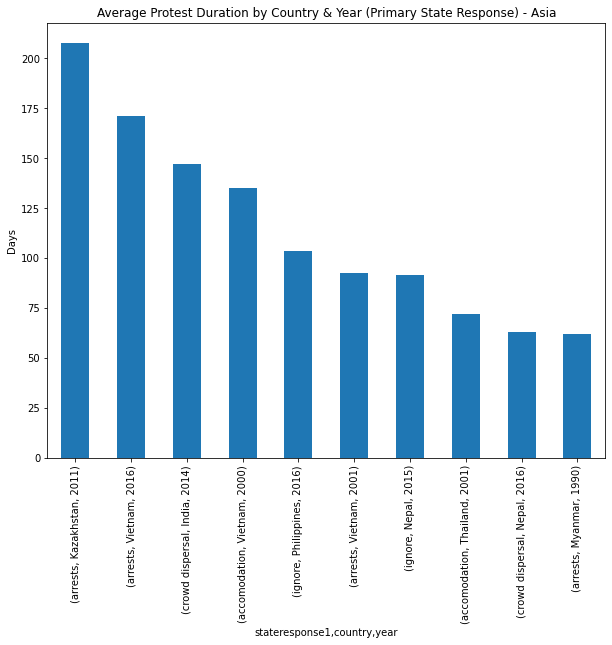

In [135]:
plt.figure(figsize=(10,8))
asia_df.groupby(['stateresponse1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Days')
plt.title('Average Protest Duration by Country & Year (Primary State Response) - Asia');

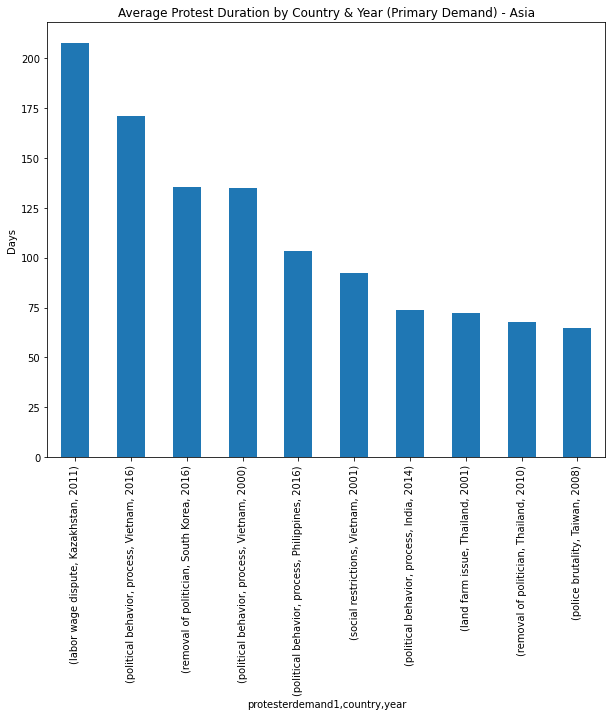

In [136]:
plt.figure(figsize=(10,8))
asia_df.groupby(['protesterdemand1','country','year'])['total_days'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Days')
plt.title('Average Protest Duration by Country & Year (Primary Demand) - Asia');

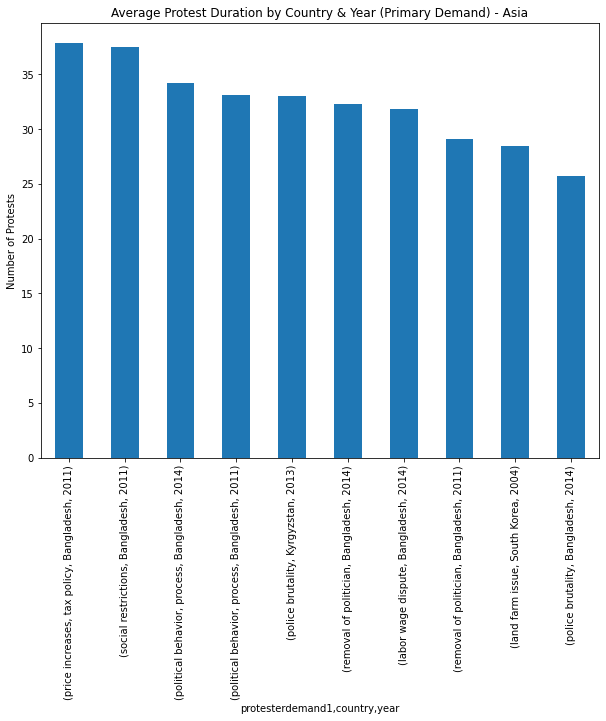

In [137]:
plt.figure(figsize=(10,8))
asia_df.groupby(['protesterdemand1','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Duration by Country & Year (Primary Demand) - Asia');

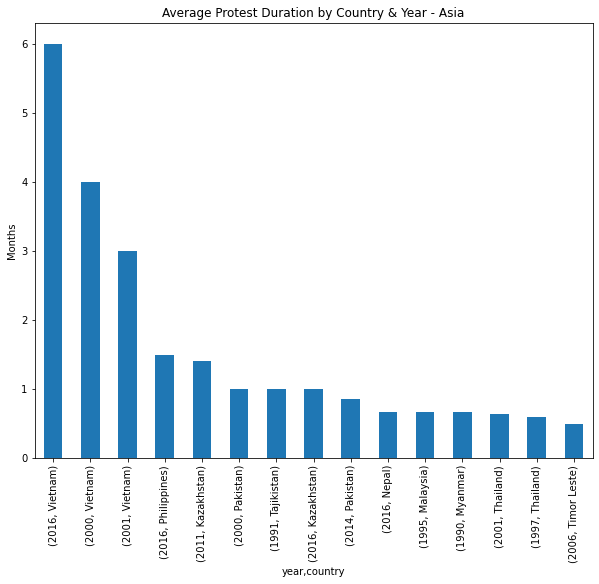

In [138]:
plt.figure(figsize=(10,8))
asia_df.groupby(['year','country'])['months'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.ylabel('Months')
plt.title('Average Protest Duration by Country & Year - Asia');

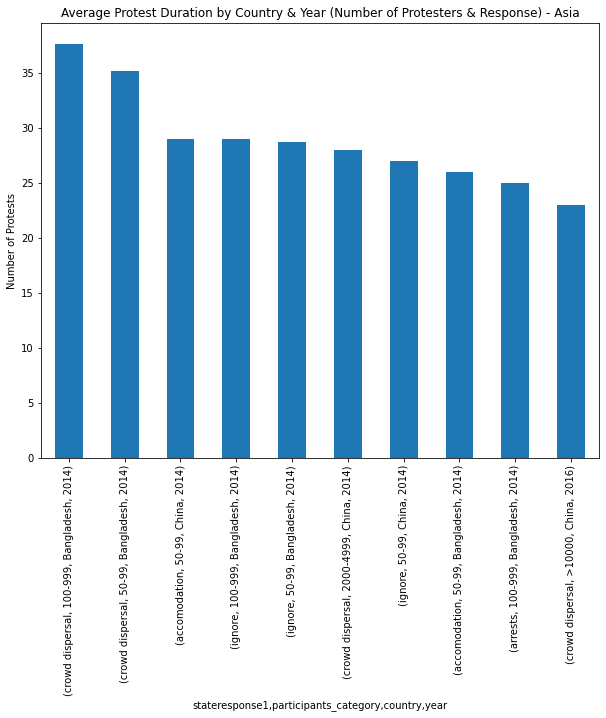

In [139]:
plt.figure(figsize=(10,8))
asia_df.groupby(['stateresponse1','participants_category','country','year'])['protestnumber'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Protests')
plt.title('Average Protest Duration by Country & Year (Number of Protesters & Response) - Asia');

In [140]:
# DataFrame format for largest protests by verage total days
pd.DataFrame(asia_df.groupby(['country','year'])['total_days'].mean().sort_values(ascending=False).head(10))

total_days
country     year            
Vietnam     2016  171.000000
            2000  135.000000
            2001   92.500000
Philippines 2016   64.250000
South Korea 2016   58.666667
India       2014   53.357143
Kazakhstan  2011   42.300000
            2016   31.500000
Pakistan    2014   28.428571
Nepal       2004   27.750000

### Further investigation of Value Counts and Nulls

In [141]:
asia_df['stateresponse1'].value_counts()

ignore             1499
crowd dispersal     681
arrests             279
accomodation        213
beatings            132
shootings            89
killings             86
Name: stateresponse1, dtype: int64

In [142]:
asia_df['participants_category'].value_counts()

100-999       240
50-99         181
2000-4999      99
>10000         75
1000-1999      24
5000-10000     22
Name: participants_category, dtype: int64

In [143]:
asia_df['protesterdemand4'].isnull().value_counts()

True     2887
False     100
Name: protesterdemand4, dtype: int64

In [144]:
asia_df['participants_category'].isnull().value_counts()

True     2346
False     641
Name: participants_category, dtype: int64

In [145]:
asia_df['protesterdemand1'].isnull().value_counts()

False    2984
True        3
Name: protesterdemand1, dtype: int64

In [146]:
asia_df['protest'].isnull().value_counts()

False    2987
Name: protest, dtype: int64

In [147]:
asia_df['region'].value_counts()

Asia    2987
Name: region, dtype: int64

In [148]:
asia_df['ccode'].value_counts()

732    343
771    336
710    263
800    246
790    209
750    203
770    172
703    160
850    147
713    147
820    146
705     81
775     73
780     71
840     62
740     58
811     54
712     49
700     38
704     36
702     32
816     19
830     14
860     12
731      8
701      4
760      2
812      2
Name: ccode, dtype: int64

### Processing for Models

In [149]:
# Removing Final Null Values

df.fillna(0,inplace=True)

In [150]:
df['region'].value_counts()

Europe             4811
Africa             3043
Asia               2987
South America      1602
MENA               1096
North America       500
Central America     437
Oceania              38
Name: region, dtype: int64

In [151]:
# df['outcome'] = df['stateresponse1'].apply(lambda x: 1 if x == 'accomodation' else int(0))
# df['outcome'] = df['accomodation'].apply(lambda x: 1 if x == 1 else int(0))

# Binarizing combined Target feature 'accomodation'

df['accomodation'] = np.where(df['accomodation'] > 0,1,0)
df['accomodation'].value_counts()

0    13022
1     1492
Name: accomodation, dtype: int64

In [152]:
# separate DFs by region
# AH to consider asia and MENA

euro_df = df[df['region'] == 'Europe'].copy()
asia_df = df[df['region'] == 'Asia'].copy()
africa_df = df[df['region'] == 'Africa'].copy()
sa_df = df[df['region'] == 'South America'].copy()
mena_df = df[df['region'] == 'MENA'].copy()
na_df = df[df['region'] == 'North America'].copy()
ca_df = df[df['region'] == 'Central America'].copy()
oc_df = df[df['region'] == 'Oceania'].copy()

In [153]:
# Checking distribution of classes
asia_df['accomodation'].value_counts()

0    2611
1     376
Name: accomodation, dtype: int64

In [154]:
# Features for Encoding and Removal

remove_features = ['ccode','startyear','endyear','startday',
                   'endday','protest','years','months','days',
                  'participants','protesteridentity','location',
                   'country','endmonth','stateresponse1',
                   'stateresponse2','stateresponse3','stateresponse4',
                   'stateresponse5','stateresponse6','stateresponse7',
                  'protesterdemand1','protesterdemand2',
                'protesterdemand3','protesterdemand4']

dummy_columns = ['region','startmonth','participants_category','year']

# dummy_columns = ['region','participants_category',
#                  'protesterdemand1','protesterdemand2',
#                 'protesterdemand3','protesterdemand4']

In [155]:
df['participants_category'].value_counts()

0             5354
100-999       3011
50-99         2387
2000-4999     1485
>10000        1250
5000-10000     563
1000-1999      464
Name: participants_category, dtype: int64

In [156]:
# new dataframes from original DF. Feature removal & encoding 

model_simple = df.drop(columns=remove_features)
asia_df = asia_df.drop(columns=remove_features)
mena_df = mena_df.drop(columns=remove_features)

model_simple = pd.get_dummies(model_simple,columns=dummy_columns)
asia_df = pd.get_dummies(asia_df,columns=dummy_columns)
mena_df = pd.get_dummies(mena_df,columns=dummy_columns)

# Removing final null values for target column
model_simple.dropna(inplace=True)
asia_df.dropna(inplace=True)
mena_df.dropna(inplace=True)
df.dropna(inplace=True)

In [157]:
model_simple['accomodation'].value_counts()

0    13022
1     1492
Name: accomodation, dtype: int64

In [158]:
model_simple.isnull().sum()

protestnumber         0
protesterviolence     0
total_days            0
labor wage dispute    0
land farm issue       0
                     ..
year_2015             0
year_2016             0
year_2017             0
year_2018             0
year_2019             0
Length: 76, dtype: int64

In [159]:
model_simple.shape

(14514, 76)

In [160]:
model_simple.dropna().shape

(14514, 76)

In [161]:
# Comparision of Feature counts for different DataFrames
mena_df.shape, asia_df.shape, africa_df.shape, euro_df.shape, sa_df.shape, na_df.shape, oc_df.shape

((1096, 69),
 (2987, 69),
 (3043, 48),
 (4811, 48),
 (1602, 48),
 (500, 48),
 (38, 48))

## Modeling: Train & Test Scores Presented Before Metrics

In [162]:
# Import inventory for models & metrics

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, plot_confusion_matrix, roc_auc_score, plot_roc_curve 
from sklearn.metrics import recall_score, precision_score, f1_score 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [163]:
X = asia_df.drop(columns='accomodation')
y = asia_df['accomodation']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=77)

In [165]:
# Baseline verification
y.value_counts(normalize=True)

0    0.874121
1    0.125879
Name: accomodation, dtype: float64

In [166]:
# - Logistic Regression - PCA Applied for this model only

pipe_log = Pipeline([
    ('ss',StandardScaler()),
    ('pc',PCA()),
    ('model',LogisticRegression())
])
log_params = {'pc__n_components':[10,15,20],
              'model__max_iter': [500, 1000],
              'model__C': [.1, .3, .5, 1],
              'model__solver': ['liblinear', 'lbfgs', 'sag'],
              'model__penalty': ['l2']}

logreg = GridSearchCV(pipe_log,
                     log_params,
                     cv=5,
                     verbose=1)

logreg.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   12.4s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 0.3, 0.5, 1],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1)

In [167]:
logreg.score(X_train,y_train), logreg.score(X_test,y_test)

(0.8732142857142857, 0.8741633199464525)

In [168]:
# Simple Decision Tree :)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [169]:
dtc.score(X_train,y_train), dtc.score(X_test,y_test)

(0.9995535714285714, 0.9183400267737617)

In [170]:
# KNN

knn_params = {'n_neighbors':[3,4,5,6],
             'weights':['uniform','distance'],
             'p':[2,3,4]}

knn = GridSearchCV(KNeighborsClassifier(),
                     knn_params,
                     cv=5,
                     verbose=1)

knn.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   12.9s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6], 'p': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [171]:
knn.score(X_train,y_train), knn.score(X_test,y_test)

(0.9044642857142857, 0.8755020080321285)

In [172]:
# Random Forest

rfc_params = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
             'oob_score':[True,False],
             'ccp_alpha':[0.01,0.05,0.07]}

# Support Vector Classifier was modelled in different Notebook due to significant runtimes.

rfc = GridSearchCV(RandomForestClassifier(),
                     rfc_params,
                     cv=5,
                     verbose=1)

In [173]:
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   47.4s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.01, 0.05, 0.07],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False]},
             verbose=1)

In [174]:
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(0.8741071428571429, 0.8741633199464525)

In [175]:
# AdaBoost

ada_params = {'n_estimators':[40,50,60],
             'learning_rate':[0.5,1,1.5]}

ada = GridSearchCV(AdaBoostClassifier(),
                     ada_params,
                     cv=5,
                     verbose=1)

In [176]:
ada.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.5s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [40, 50, 60]},
             verbose=1)

In [177]:
ada.score(X_train,y_train), ada.score(X_test,y_test)

(0.9098214285714286, 0.8995983935742972)

In [178]:
# Bag

bag_params = {'n_estimators':[10,20,30],
              'max_samples':[1,2,3],
             'warm_start':[True,False]
             }

bag = GridSearchCV(BaggingClassifier(),
                     bag_params,
                     cv=5,
                     verbose=1)

bag.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_samples': [1, 2, 3], 'n_estimators': [10, 20, 30],
                         'warm_start': [True, False]},
             verbose=1)

In [179]:
bag.score(X_train,y_train), bag.score(X_test,y_test)

(0.8741071428571429, 0.8741633199464525)

In [180]:
# SVC

svc_params = {'C':[0.01,0.05],
             'kernel':['poly','rbf'],
             'degree':[3,4,5]}

svc = GridSearchCV(SVC(),
                     svc_params,
                     cv=5,
                     verbose=1)

svc.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.4s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.05], 'degree': [3, 4, 5],
                         'kernel': ['poly', 'rbf']},
             verbose=1)

In [181]:
svc.score(X_train,y_train), svc.score(X_test,y_test)

(0.8794642857142857, 0.8768406961178046)

In [182]:
preds_lr = logreg.predict(X_test)
preds_dtc = dtc.predict(X_test)
preds_knn = knn.predict(X_test)
preds_rfc = rfc.predict(X_test)
preds_ada = ada.predict(X_test)
preds_bag = bag.predict(X_test)
preds_svc = svc.predict(X_test)

preds_dict = {'Log Reg':preds_lr,
             'Decision Tree':preds_dtc,
             'KNN':preds_knn,
             'Random Forest':preds_rfc,
             'AdaBoost':preds_ada,
             'Bagger':preds_bag,
             'SVC':preds_svc}
 
model_list = [logreg,dtc,knn,rfc,ada,bag,svc]

In [183]:
# Credit to Julia for function

def scoring_class(model, X1, y1, X2, y2):
#     model.fit(X1, y1)
    print(f'{model} train score R2: {model.score(X1, y1)}')
    print(f'{model} test score Rs: {model.score(X2, y2)}')
    print('------------------------------------------------------------------------')
    
for model in model_list:
    scoring_class(model,X_train,y_train,X_test,y_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 0.3, 0.5, 1],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},
             verbose=1) train score R2: 0.8732142857142857
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [0.1, 0.3, 0.5, 1],
                         'model__max_iter': [500, 1000],
                         'model__penalty': ['l2'],
                         'model__solver': ['liblinear', 'lbfgs', 'sag'],
                         'pc__n_components': [10, 15, 20]},

### Metrics:

Logistic Regression precision:  nan
Logistic Regression sensitivity:  0.0
Logistic Regression specificity:  1.0
Logistic Regression accuracy:  0.8741633199464525


/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


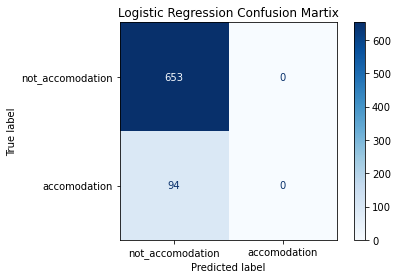

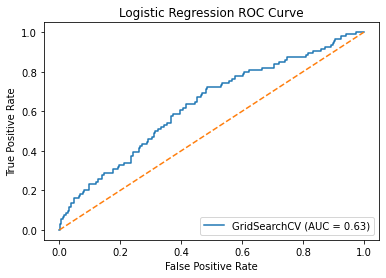

In [184]:
# Produce Metrics

tn, fp, fn, tp = confusion_matrix(y_test,preds_lr).ravel()

plot_confusion_matrix(logreg,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['not_accomodation','accomodation'])
plt.title('Logistic Regression Confusion Martix')

print('Logistic Regression precision: ',tp / (tp + fp))
print('Logistic Regression sensitivity: ',tp / (tp + fn))
print('Logistic Regression specificity: ',tn / (tn + fp))
print('Logistic Regression accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(logreg,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Logistic Regression ROC Curve')
plt.legend;

Decision Tree precision:  0.6941176470588235
Decision Tree sensitivity:  0.6276595744680851
Decision Tree specificity:  0.9601837672281777
Decision Tree accuracy:  0.9183400267737617


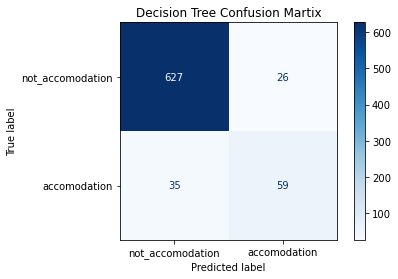

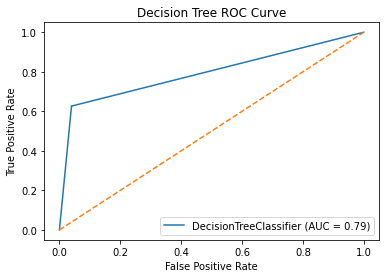

In [185]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_dtc).ravel()

plot_confusion_matrix(dtc,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['not_accomodation','accomodation'])
plt.title('Decision Tree Confusion Martix')

print('Decision Tree precision: ',tp / (tp + fp))
print('Decision Tree sensitivity: ',tp / (tp + fn))
print('Decision Tree specificity: ',tn / (tn + fp))
print('Decision Tree accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(dtc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Decision Tree ROC Curve')
plt.legend;

KNN precision:  0.5263157894736842
KNN sensitivity:  0.10638297872340426
KNN specificity:  0.9862174578866769
KNN accuracy:  0.8755020080321285


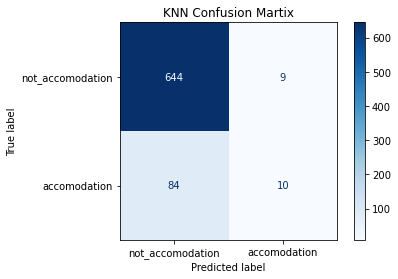

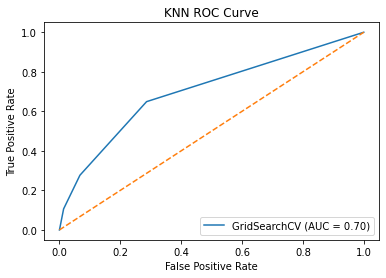

In [186]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_knn).ravel()

plot_confusion_matrix(knn,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['not_accomodation','accomodation'])
plt.title('KNN Confusion Martix')

print('KNN precision: ',tp / (tp + fp))
print('KNN sensitivity: ',tp / (tp + fn))
print('KNN specificity: ',tn / (tn + fp))
print('KNN accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(knn,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('KNN ROC Curve')
plt.legend;

Random Forest precision:  nan
Random Forest sensitivity:  0.0
Random Forest specificity:  1.0
Random Forest accuracy:  0.8741633199464525


/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


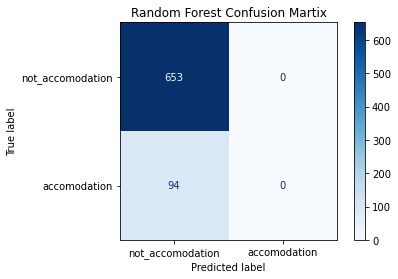

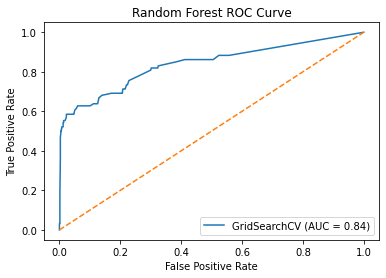

In [187]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_rfc).ravel()

plot_confusion_matrix(rfc,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['not_accomodation','accomodation'])
plt.title('Random Forest Confusion Martix')

print('Random Forest precision: ',tp / (tp + fp))
print('Random Forest sensitivity: ',tp / (tp + fn))
print('Random Forest specificity: ',tn / (tn + fp))
print('Random Forest accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(rfc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Random Forest ROC Curve')
plt.legend;

AdaBoost precision:  0.7111111111111111
AdaBoost sensitivity:  0.3404255319148936
AdaBoost specificity:  0.9800918836140888
AdaBoost accuracy:  0.8995983935742972


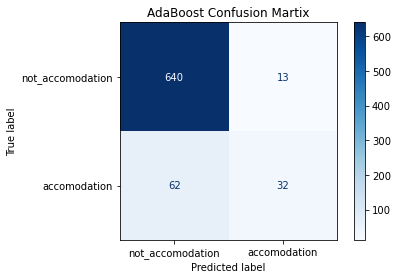

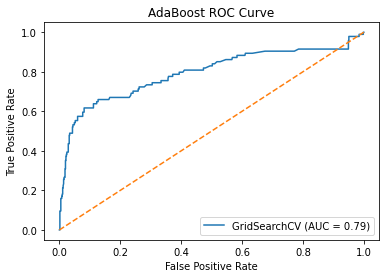

In [188]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_ada).ravel()

plot_confusion_matrix(ada,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['not_accomodation','accomodation'])
plt.title('AdaBoost Confusion Martix')

print('AdaBoost precision: ',tp / (tp + fp))
print('AdaBoost sensitivity: ',tp / (tp + fn))
print('AdaBoost specificity: ',tn / (tn + fp))
print('AdaBoost accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(ada,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('AdaBoost ROC Curve')
plt.legend;

Bagger precision:  nan
Bagger sensitivity:  0.0
Bagger specificity:  1.0
Bagger accuracy:  0.8741633199464525


/Users/ash/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


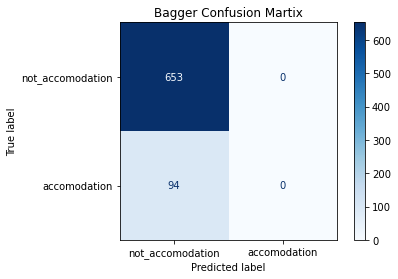

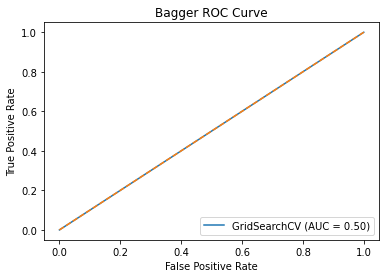

In [189]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_bag).ravel()

plot_confusion_matrix(bag,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['not_accomodation','accomodation'])
plt.title('Bagger Confusion Martix')

print('Bagger precision: ',tp / (tp + fp))
print('Bagger sensitivity: ',tp / (tp + fn))
print('Bagger specificity: ',tn / (tn + fp))
print('Bagger accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(bag,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('Bagger ROC Curve')
plt.legend;

SVC precision:  0.75
SVC sensitivity:  0.031914893617021274
SVC specificity:  0.998468606431853
SVC accuracy:  0.8768406961178046


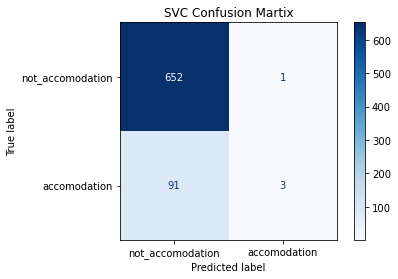

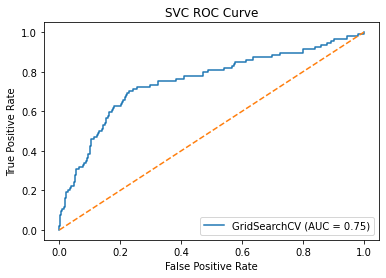

In [190]:
tn, fp, fn, tp = confusion_matrix(y_test,preds_svc).ravel()

plot_confusion_matrix(svc,X_test,y_test,cmap='Blues',
                      values_format='d',display_labels=['not_accomodation','accomodation'])
plt.title('SVC Confusion Martix')

print('SVC precision: ',tp / (tp + fp))
print('SVC sensitivity: ',tp / (tp + fn))
print('SVC specificity: ',tn / (tn + fp))
print('SVC accuracy: ', (tn + tp) / (tn + fp + fn + tp))

plot_roc_curve(svc,X_test,y_test)
plt.plot([0,1],[0,1],label='baseline',linestyle='--')
plt.title('SVC ROC Curve')
plt.legend;

In [191]:
# Restate baseline for reference
y_test.value_counts(normalize=True)

0    0.874163
1    0.125837
Name: accomodation, dtype: float64